### ANN using Tensorflow and Keras


In [170]:
import pandas as pd
import numpy as np 
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [171]:
df = pd.read_csv(r'D:\my stuff\Coding\ML\datasets\dataset_heart.csv')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [173]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [174]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [175]:
df.isnull().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

<Axes: ylabel='chest pain type'>

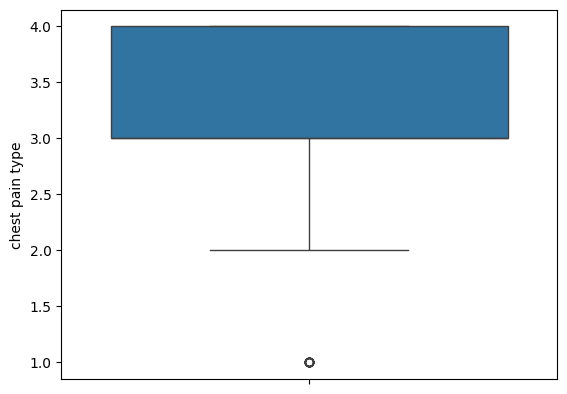

In [176]:
sns.boxplot(df['chest pain type'])

<Axes: ylabel='resting blood pressure'>

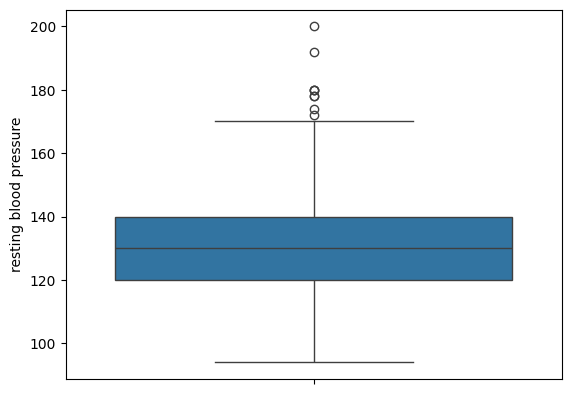

In [177]:
sns.boxplot(df['resting blood pressure'])

<Axes: ylabel='serum cholestoral'>

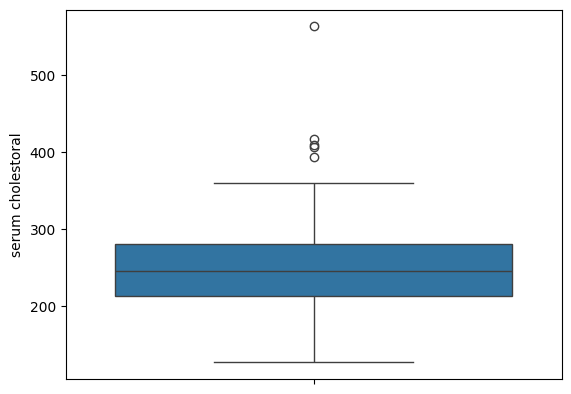

In [178]:
sns.boxplot(df['serum cholestoral'])

<Axes: ylabel='max heart rate'>

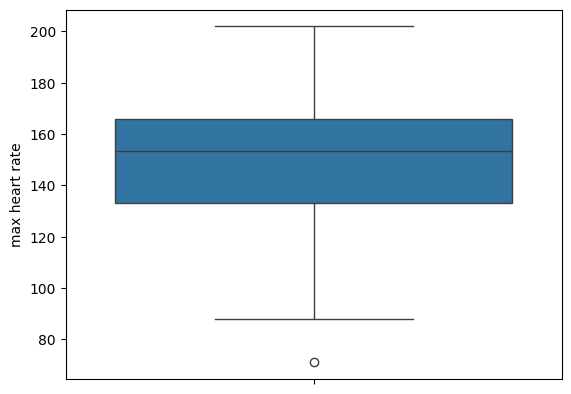

In [179]:
sns.boxplot(df['max heart rate'])

<Axes: ylabel='oldpeak'>

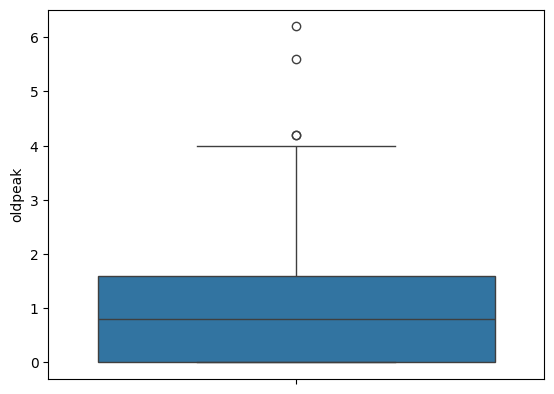

In [180]:
sns.boxplot(df['oldpeak'])

<Axes: ylabel='major vessels'>

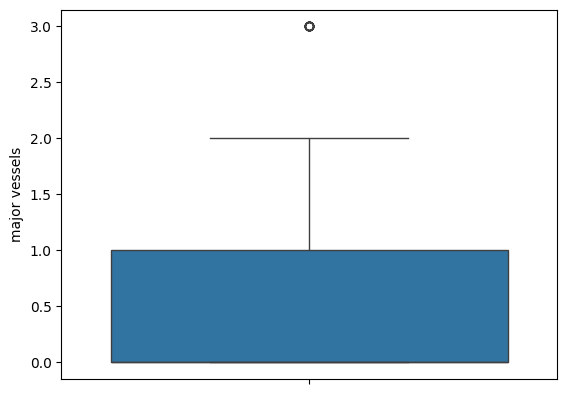

In [181]:
sns.boxplot(df['major vessels'])

<Axes: ylabel='chest pain type'>

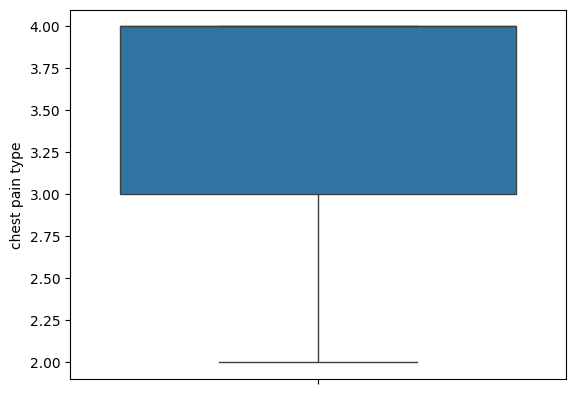

In [182]:
Q1 = df['chest pain type'].quantile(0.25)
Q3 = df['chest pain type'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df1 = df[(df['chest pain type'] > l_limit) & (df['chest pain type'] < u_limit)]
sns.boxplot(df1['chest pain type'])

<Axes: ylabel='resting blood pressure'>

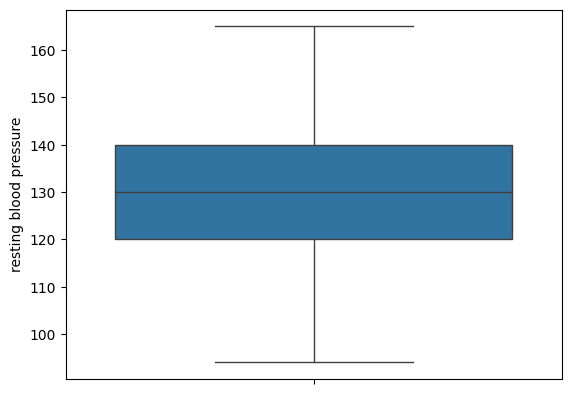

In [183]:
Q1 = df['resting blood pressure'].quantile(0.25)
Q3 = df['resting blood pressure'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df1 = df[(df['resting blood pressure'] > l_limit) & (df['resting blood pressure'] < u_limit)]
sns.boxplot(df1['resting blood pressure'])

<Axes: ylabel='serum cholestoral'>

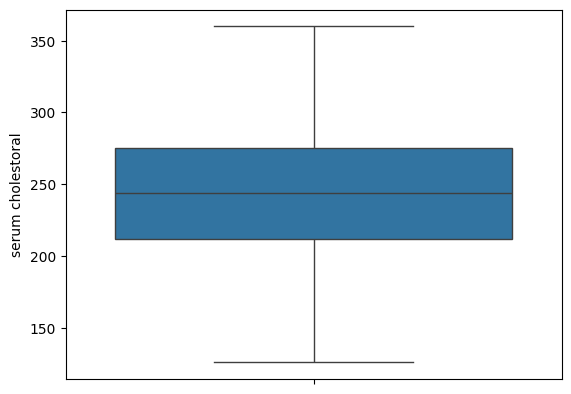

In [184]:
Q1 = df['serum cholestoral'].quantile(0.25)
Q3 = df['serum cholestoral'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df1 = df[(df['serum cholestoral'] > l_limit) & (df['serum cholestoral'] < u_limit)]
sns.boxplot(df1['serum cholestoral'])

<Axes: ylabel='max heart rate'>

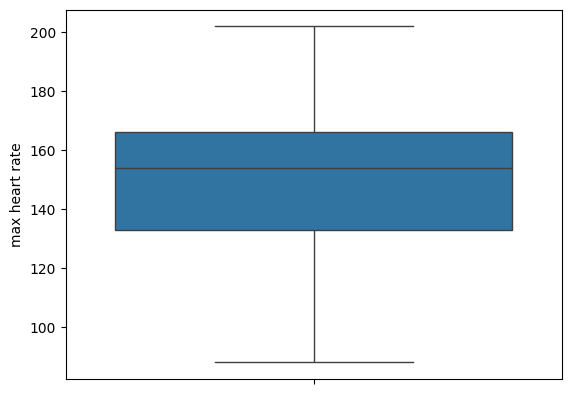

In [185]:
Q1 = df['max heart rate'].quantile(0.25)
Q3 = df['max heart rate'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df1 = df[(df['max heart rate'] > l_limit) & (df['max heart rate'] < u_limit)]
sns.boxplot(df1['max heart rate'])

<Axes: ylabel='oldpeak'>

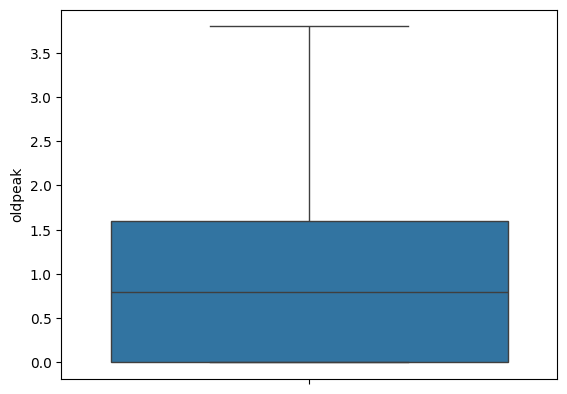

In [186]:
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df1 = df[(df['oldpeak'] > l_limit) & (df['oldpeak'] < u_limit)]
sns.boxplot(df1['oldpeak'])

<Axes: ylabel='major vessels'>

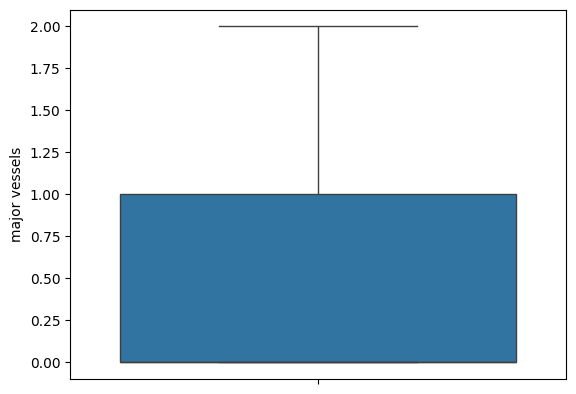

In [187]:
Q1 = df['major vessels'].quantile(0.25)
Q3 = df['major vessels'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df1 = df[(df['major vessels'] > l_limit) & (df['major vessels'] < u_limit)]
sns.boxplot(df1['major vessels'])

In [188]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 1 to 268
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   251 non-null    int64  
 1   sex                                   251 non-null    int64  
 2   chest pain type                       251 non-null    int64  
 3   resting blood pressure                251 non-null    int64  
 4   serum cholestoral                     251 non-null    int64  
 5   fasting blood sugar                   251 non-null    int64  
 6   resting electrocardiographic results  251 non-null    int64  
 7   max heart rate                        251 non-null    int64  
 8   exercise induced angina               251 non-null    int64  
 9   oldpeak                               251 non-null    float64
 10  ST segment                            251 non-null    int64  
 11  major vessels           

In [189]:
x = df1[['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'fasting blood sugar',
         'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment',
         'major vessels', 'thal']]
y = df1[['heart disease']]

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [191]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [192]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )


c:\Users\Mrunmayee\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [193]:
classifier.fit(x_train, y_train, batch_size=8, epochs = 30)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5191 - loss: 0.6852
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5574 - loss: 0.6397
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5472 - loss: 0.5406
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5224 - loss: 0.3344
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6103 - loss: 0.0459
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5102 - loss: -0.7034
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5308 - loss: -1.4239 
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5488 - loss: -2.4983 
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5439 - loss: -3.8813
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5579 - loss: -6.3143
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5349 - loss: -8.3395
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5

In [194]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [195]:
cm = confusion_matrix(y_test,y_pred)
cm


array([[36,  0],
       [15,  0]], dtype=int64)

In [196]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)


70.58823529411765
